## 数据规范化

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df1 = pd.read_csv('data1.csv', names=['square', 'bedrooms', 'price'])
df1.head()

,square,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## 数据归一化

In [5]:
def normalize_feature(df):
    return df.apply(lambda column: (column - column.mean()) / column.std())

df = normalize_feature(df1)
df.head()

,square,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
square      47 non-null float64
bedrooms    47 non-null float64
price       47 non-null float64
dtypes: float64(3)
memory usage: 1.2 KB


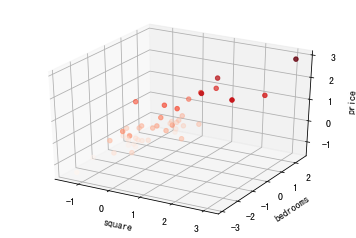

In [8]:
from mpl_toolkits import mplot3d

ax = plt.axes(projection='3d')
ax.set_xlabel('square')
ax.set_ylabel('bedrooms')
ax.set_zlabel('price')
ax.scatter3D(df['square'], df['bedrooms'], df['price'], c=df['price'], cmap='Reds')

## 数据处理：添加 ones 列（x0）

In [9]:
# ones是n行1列的数据框，表示x0恒为1
ones = pd.DataFrame({'ones': np.ones(len(df))})

In [14]:
ones.shape

(47, 1)

In [15]:
# 根据列合并数据
df = pd.concat([ones, df], axis=1)
df.head()

,ones,square,bedrooms,price
0,1.0,0.130010,-0.223675,0.475747
1,1.0,-0.504190,-0.223675,-0.084074
2,1.0,0.502476,-0.223675,0.228626
3,1.0,-0.735723,-1.537767,-0.867025
4,1.0,1.257476,1.090417,1.595389


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 4 columns):
ones        47 non-null float64
square      47 non-null float64
bedrooms    47 non-null float64
price       47 non-null float64
dtypes: float64(4)
memory usage: 1.5 KB


In [20]:
X_data = np.array(df[df.columns[0:3]])
y_data = np.array(df[df.columns[-1]]).reshape(len(df), 1)
print(X_data.shape)
print(y_data.shape)

(47, 3)
(47, 1)
